<a href="https://www.kaggle.com/code/arshmankhalid/build-your-first-recommender-beginner-s-guide?scriptVersionId=217074378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">Product Recomendation System | Beginner Guide </p>

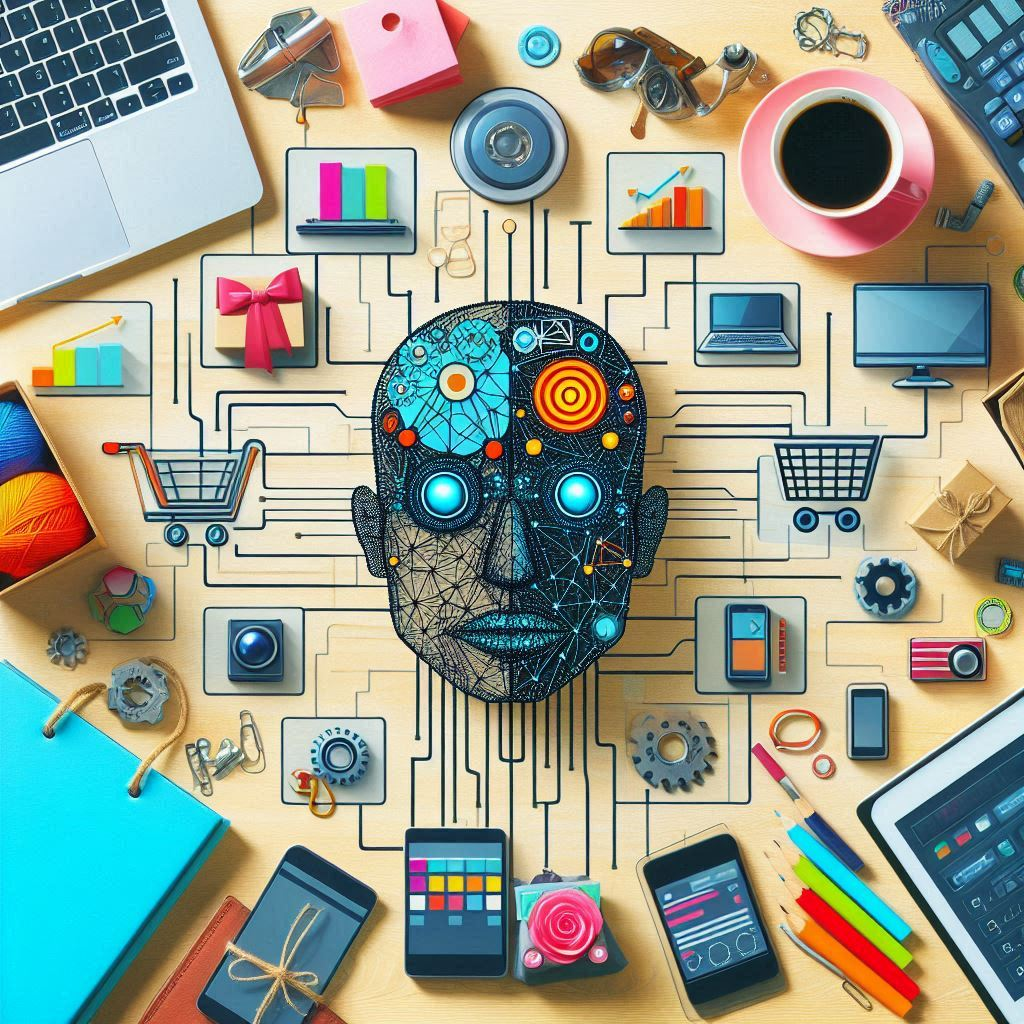

# <p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">About Auther</p>



# **Arshman Khalid**  
<p style="font-size: 1.5rem; font-weight: bold;">Data Scientist | Software Engineer | ex Consultant PwC | ex Senior Data Analyst Fortune 500</p>

With over 5 years of expertise in data science and software engineering, I am dedicated to transforming complex data into actionable insights. My focus lies in predictive analytics, data strategy, and the implementation of robust machine learning models that drive measurable business outcomes. I have a track record of optimizing operations, reducing costs, and improving decision-making processes across industries. Proficient in Python, Alteryx, Power BI, and cloud platforms.

When I am not wrangling datasets, you will find me attempting to code my way to the perfect cup of coffee!

# **Lets Connect**

<div style="text-align: left; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/arshmankhalid/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://x.com/arshmankhalid" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #000; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">X</span>
    </a>
    <a href="https://github.com/arshmankhalid88" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
    <a href="https://www.kaggle.com/arshmankhalid" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #20BEFF; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">Kaggle</span>
    </a>
</div>



# <p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">Importing Libraries</p>

In [1]:
import numpy as np  # numerical operations on arrays and matrices
import pandas as pd  # data manipulation and analysis
import os  # interacting with the operating system and file paths
import re  # regular expression operations
import matplotlib.pyplot as plt  # creating static visualizations and plots
import seaborn as sns  # for attractive and informative statistical graphics
from sklearn.neighbors import NearestNeighbors  # Algorithm for unsupervised learning (nearest neighbors)
from sklearn.preprocessing import StandardScaler  # scaling features by removing the mean and scaling to unit variance
from IPython.display import display, HTML
# pd.set_option('display.max_columns', None)  # Set pandas to display all columns
# pd.set_option('display.max_rows', None)  # Set pandas to display all rows
from sklearn.experimental import enable_iterative_imputer  # Enable experimental feature for iterative imputation
from sklearn.impute import IterativeImputer  # Library for imputing missing values using multiple imputations
from sklearn.preprocessing import LabelEncoder  # encoding categorical labels into numerical form
from sklearn.model_selection import KFold  # Cross-validation strategy that splits data into k consecutive folds
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score  # Metrics for model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into a matrix of TF-IDF features
from sklearn.neighbors import NearestNeighbors  # Repeated for nearest neighbors algorithm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 About Dataset</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">This is Amazon Product dataset and it includes the following features:</p>
    <ul style="font-size: 16px; line-height: 1.6; color: #333333;">
        <li><strong>name</strong>: The name of the product</li>
        <li><strong>main_category</strong>: The main category the product belongs to</li>
        <li><strong>sub_category</strong>: The sub-category the product belongs to</li>
        <li><strong>image</strong>: The image of what the product looks like</li>
        <li><strong>link</strong>: The Amazon website reference link for the product</li>
        <li><strong>ratings</strong>: The ratings given by Amazon customers for the product</li>
        <li><strong>no of ratings</strong>: The number of ratings given to this product on Amazon</li>
        <li><strong>discount_price</strong>: The discounted price of the product</li>
        <li><strong>actual_price</strong>: The actual MRP of the product</li>
    </ul>
    <p style="font-size: 16px; line-height: 1.6; color: #333333; margin-top: 10px;">For this task, only 10,000 rows were randomly selected from the dataset. You can view the complete dataset <a href="https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset/data" style="color: #ff3131; text-decoration: none; font-weight: bold;">here</a>.</p>
</div>

In [2]:
# importing the dataset 

df_1= pd.read_csv('/kaggle/input/sample-of-amazon-sales-data/df_sample.csv')

In [5]:
# i am using a sample from this big data you can also use a sample 

# df_sample = df_1.sample(n=10000, random_state=42).reset_index(drop=True)

df_sample = df_1

In [6]:
df_sample.shape

(10000, 9)

# <p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">Quick Overview Of Data</p>

In [7]:
def styled_heading(text):
    return f"""
    <p style="background-color: #e4d9bd; 
               font-family:'Dancing Script', cursive; 
               font-weight:bold; 
               color: #ff3131; 
               font-size:120%; 
               text-align:center; 
               border: 1px solid black; 
               border-radius:10px; 
               padding: 10px; 
               box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">
        {text}
    </p>
    """

def print_error(message):
    display(HTML(styled_heading("Error")))
    print(f"An error occurred: {message}")

def colored_line(color='#323c6a'):
    return ""

def print_dataset_analysis(train_dataset, n_top=5, heading_color='#323c6a', line_color='#323c6a'):
    try:
        # Printing top values
        train_heading = styled_heading(f"🔝 Top {n_top} rows of Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(train_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(train_dataset.head(n_top).to_html()))

        # Printing dataset summary
        summary_heading = styled_heading("📊 Summary of Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(summary_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(train_dataset.describe().to_html()))

        # Printing null values
        null_heading = styled_heading("❌ Null Values in Dataset")
        
        # Using df_1 to count null values
        train_null_count = train_dataset.isnull().sum()

        display(HTML(colored_line(line_color)))
        display(HTML(null_heading))
        display(HTML(colored_line(line_color)))

        # Check for null values and display accordingly
        if train_null_count.sum() == 0:
            display(HTML("<p>No null values in the dataset.</p>"))
        else:
            # Create a DataFrame to display the counts of null values
            null_values_df = train_null_count[train_null_count > 0].to_frame(name='Null Count')
            display(HTML(null_values_df.to_html()))
            display(HTML("<p>These are the null values in each column.</p>"))

        # Printing duplicate values
        duplicate_heading = styled_heading("♻️ Duplicate Values in Dataset")
        train_duplicates = train_dataset.duplicated().sum()

        display(HTML(colored_line(line_color)))
        display(HTML(duplicate_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(f"<p>{train_duplicates} duplicate rows</p>"))

        # Printing number of rows and columns
        shape_heading = styled_heading("📏 Number of Rows and Columns in Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(shape_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(f"<p>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))

    except Exception as e:
        print_error(str(e))

def print_unique_values(train_dataset, heading_color='#323c6a', line_color='#323c6a'):
    try:
        unique_values_heading = styled_heading("🔢 Unique Values in Dataset")
        
        display(HTML(colored_line(line_color)))
        display(HTML(unique_values_heading))
        display(HTML(colored_line(line_color)))
        
        unique_values_table = "<table border='1'><tr><th>Column Name</th><th>Data Type</th><th>Unique Values</th></tr>"
        
        for column in train_dataset.columns:
            unique_values = train_dataset[column].unique()[:7]  # Taking at least 7 unique values
            unique_values_str = ', '.join(map(str, unique_values))
            data_type = train_dataset[column].dtype
            unique_values_table += f"<tr><td>{column}</td><td>{data_type}</td><td>{unique_values_str}</td></tr>"
        
        unique_values_table += "</table>"
        display(HTML(unique_values_table))
    
    except Exception as e:
        print_error(str(e))

In [8]:
print_dataset_analysis(df_sample)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,MyBlush Women Top,women's clothing,Western Wear,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/71WewDr9t8L._AC_UL320_.jpg,https://www.amazon.in/MyBlush-Womens-Solid-Classic-MYB164_Black/dp/B09924874L/ref=sr_1_9003?qid=1679153769&s=apparel&sr=1-9003,3.5,9,₹699,"₹2,299"
1,"Ridhi Home & Decor Brass Decorative Weighing Scale Set, 10 g (Golden and Brown)",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61j4CowaamL._AC_UL320_.jpg,https://www.amazon.in/Brass-Decorative-Weighing-Scale-10grm/dp/B07L36G3KC/ref=sr_1_7019?qid=1679135988&s=appliances&sr=1-7019,3.7,64,₹380,₹500
2,Rangshaily Men's Black White Floral Print Fullsleeves Premium Cotton Regular Fit Shirt with Spread Collar,men's clothing,Shirts,https://m.media-amazon.com/images/I/51oiWRu+GpL._AC_UL320_.jpg,https://www.amazon.in/Rangshaily-Regular-Floral-Fullsleeves-Cotton/dp/B0BR7K4T6X/ref=sr_1_7499?qid=1679141101&s=apparel&sr=1-7499,NaN,NaN,₹649,₹999
3,Adidas Men's Ellipto Run M Leather Shoe,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/71RsZ19e-wL._AC_UL320_.jpg,https://www.amazon.in/Adidas-Ellipto-Running-DOVGRY-FTWWHT/dp/B09SF1HKF8/ref=sr_1_5075?qid=1679147366&s=shoes&sr=1-5075,3.6,23,"₹1,274","₹2,499"
4,JJ TEES Polyester Half Sleeve Jersey with Round Collar and Digital Print All Over for Men (Color: Navy Blue and Red),men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/61fXr8brnCL._AC_UL320_.jpg,https://www.amazon.in/JJ-TEES-Polyester-Sleeve-Digital/dp/B08N6QPFTC/ref=sr_1_14744?qid=1679140547&s=apparel&sr=1-14744,3.5,10,₹345,₹999


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,10000,10000,10000,10000,10000,6849,6849,8889,9677
unique,9684,20,108,9815,10000,42,1175,2450,1869
top,PC Jeweller 22k (916) Yellow Gold Ring for Women,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/51uEPldT42L._AC_UL320_.jpg,https://www.amazon.in/Aadyas-Creation%C2%AE-Regular-Personalized-XX-Large/dp/B0BKXZTQJT/ref=sr_1_11466?qid=1679140394&s=apparel&sr=1-11466,4.0,1,₹499,₹999
freq,14,2091,383,67,1,676,721,325,865


,Null Count
ratings,3151
no_of_ratings,3151
discount_price,1111
actual_price,323


<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Data Cleaning </h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">Data cleaning is a crucial step in preparing datasets for analysis and modeling. It involves identifying and handling missing, incorrect, or irrelevant data. Common tasks include removing duplicates, filling in missing values, and standardizing formats to ensure consistency across features. Proper data cleaning improves the accuracy of machine learning models by eliminating noise and ensuring that the dataset represents the real-world problem effectively. This process enhances model performance and helps avoid misleading outcomes.</p>
</div>

In [10]:
df = df_sample

In [11]:
# We are not going to use this column so better to remove it 
df = df.drop(['link'], axis=1)

<p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 5px; width: 80%; margin: auto; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 1. df['name'].</p>


In [12]:
df['name'].unique()

array(['MyBlush Women Top',
       'Ridhi Home & Decor Brass Decorative Weighing Scale Set, 10 g (Golden and Brown)',
       "Rangshaily Men's Black White Floral Print Fullsleeves Premium Cotton Regular Fit Shirt with Spread Collar",
       ...,
       'Parineeta Gems Panna Stone Original Certified/Panna Stone/emerold Stone/Panna Stone 6.00 Ratti Original Certified/Panna St...',
       'Knotty Needles Check Pattern Round Neck Sweatshirt for Women',
       "Aadya's Creation® Cotton Multi Color Round Neck Regular Fit T-Shirt for Men and Women| Personalized T-Shirt Create Your Ow..."],
      dtype=object)

In [13]:
df['name'].duplicated().sum()

316

In [14]:
# Displaying duplicate rows based on the 'name' column

duplicate_names = df[df['name'].duplicated(keep=False)]

# Showing the data where there are only duplicated rows

duplicate_names.head(100)

,name,main_category,sub_category,image,ratings,no_of_ratings,discount_price,actual_price
6,Avsar 14k (585) Yellow Gold Ring for Women,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/71er7EuZ1w...,NaN,NaN,"₹16,312","₹39,524"
17,Spykar Men's Super Skinny Fit Jeans,men's clothing,Jeans,https://m.media-amazon.com/images/W/IMAGERENDE...,3.0,1,"₹1,529","₹3,399"
28,RARE Women Casual Dress,women's clothing,Western Wear,https://m.media-amazon.com/images/I/61t4HcaTlD...,2.8,8,₹748,"₹1,999"
34,ZEYO Women's Cotton Heart Printed Night Suit S...,women's clothing,Clothing,https://m.media-amazon.com/images/I/81zEqFPNJw...,4.1,"1,494",₹849,"₹2,499"
69,Van Heusen Men's Track Pants,stores,Men's Fashion,https://m.media-amazon.com/images/W/IMAGERENDE...,3.9,"1,811",₹959,"₹1,199"
...,...,...,...,...,...,...,...,...
1792,PC Jeweller 18k (750) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,NaN,NaN,"₹63,878","₹75,150"
1798,BlueRigger Ultra Series 8K HDMI to HDMI Cable ...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/W/IMAGERENDE...,4.3,540,"₹1,049","₹37,073"
1803,Jack & Jones Men Briefs,men's clothing,Innerwear,https://m.media-amazon.com/images/I/81n5WzZMkV...,1.0,1,₹650,"₹1,299"
1852,AMPEREUS Digital Pre-Calibrated Imported Pen T...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/41YgN0KKfK...,4.2,147,₹259,₹999


In [15]:
duplicate_names_sorted = duplicate_names.sort_values(by='name')
duplicate_names_sorted.head(50)

,name,main_category,sub_category,image,ratings,no_of_ratings,discount_price,actual_price
3191,14 KT (585) Yellow Gold and Diamond Ring Jewel...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/41kS5E5m34...,NaN,NaN,"₹26,036","₹45,324"
1768,14 KT (585) Yellow Gold and Diamond Ring Jewel...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,NaN,NaN,"₹29,748","₹53,640"
4638,AJANTA Mens Black Formal Shoes,men's shoes,Formal Shoes,https://m.media-amazon.com/images/I/51+RBrCyRn...,NaN,NaN,NaN,"₹1,249"
6927,AJANTA Mens Black Formal Shoes,men's shoes,Formal Shoes,https://m.media-amazon.com/images/I/51ij9mnTyk...,3.0,2,NaN,"₹1,289"
4581,AMPEREUS Digital Pre-Calibrated Imported Pen T...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,4.2,147,₹259,₹999
1852,AMPEREUS Digital Pre-Calibrated Imported Pen T...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/41YgN0KKfK...,4.2,147,₹259,₹999
4325,ARiANA DuoSafe Unisex Kid's Very Fine Cotton C...,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/61Ss3Crz2J...,4.1,"2,748",NaN,₹250
3950,ARiANA DuoSafe Unisex Kid's Very Fine Cotton C...,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/61Ss3Crz2J...,4.1,"2,748",NaN,₹250
3162,ASHWATH Women's Printed Nazneen Dupatta.,women's clothing,Clothing,https://m.media-amazon.com/images/W/IMAGERENDE...,3.8,100,₹299,₹777
9751,ASHWATH Women's Printed Nazneen Dupatta.,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/71DkxAj-Az...,3.8,100,₹299,₹777


> These are not actually duplicate values; the image addresses, discount, and other values are different, so it would be better to keep them to capture more relevance in our recommendation system

In [16]:
def clean_product_names(name):

    if isinstance(name, str):  # Ensure it's a string

        # Remove special characters

        name = re.sub(r'[^a-zA-Z0-9\s]+', '', name)

        # Convert to lowercase

        name = name.lower()

        # Trim whitespace

        name = name.strip()

    return name

df['name'] = df['name'].apply(clean_product_names)

In [17]:
df['name'].unique()

array(['myblush women top',
       'ridhi home  decor brass decorative weighing scale set 10 g golden and brown',
       'rangshaily mens black white floral print fullsleeves premium cotton regular fit shirt with spread collar',
       ...,
       'parineeta gems panna stone original certifiedpanna stoneemerold stonepanna stone 600 ratti original certifiedpanna st',
       'knotty needles check pattern round neck sweatshirt for women',
       'aadyas creation cotton multi color round neck regular fit tshirt for men and women personalized tshirt create your ow'],
      dtype=object)

<p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 5px; width: 80%; margin: auto; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 2. df['main_category'].</p>


In [18]:
df['main_category'].unique()

array(["women's clothing", 'appliances', "men's clothing", "men's shoes",
       "kids' fashion", 'accessories', 'beauty & health', "women's shoes",
       'toys & baby products', 'home & kitchen', 'tv, audio & cameras',
       'car & motorbike', 'stores', 'grocery & gourmet foods',
       'sports & fitness', 'bags & luggage', 'pet supplies',
       'industrial supplies', 'music', 'home, kitchen, pets'],
      dtype=object)

In [19]:
# Function to clean and standardize the main_category
def clean_category(category):
    category = category.lower()
    category = category.strip()
    category = category.replace('&', 'and')
    category = category.replace(',', '')
    if "home" in category:
        category = 'home and kitchen'
    return category
df['main_category'] = df['main_category'].apply(clean_category)

In [20]:
df['main_category'].unique()

array(["women's clothing", 'appliances', "men's clothing", "men's shoes",
       "kids' fashion", 'accessories', 'beauty and health',
       "women's shoes", 'toys and baby products', 'home and kitchen',
       'tv audio and cameras', 'car and motorbike', 'stores',
       'grocery and gourmet foods', 'sports and fitness',
       'bags and luggage', 'pet supplies', 'industrial supplies', 'music'],
      dtype=object)

In [23]:
# Assuming 'df' is your DataFrame
main_category = df['main_category'].value_counts()
maincat_counts = main_category.values

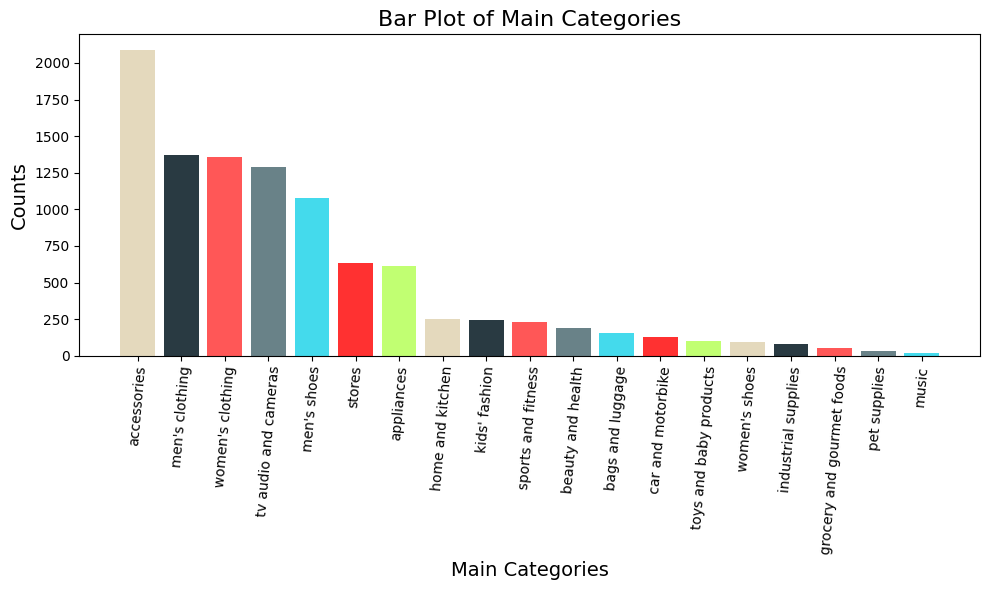

In [24]:
# Custom colors
colors = ['#e4d9bd', '#293a42', '#ff5757', '#698288', '#44daec', '#ff3131', '#c1ff72']
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(main_category.index, maincat_counts, color=colors)
plt.title('Bar Plot of Main Categories', fontsize=16)
plt.xlabel('Main Categories', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

<p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 5px; width: 80%; margin: auto; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 3. df['sub_category'].</p>


In [25]:
df['sub_category'].unique()

array(['Western Wear', 'All Appliances', 'Shirts', 'Sports Shoes',
       'T-shirts & Polos', "Kids' Watches", 'Gold & Diamond Jewellery',
       'Innerwear', 'Fashion & Silver Jewellery', 'Formal Shoes',
       'Household Supplies', 'Fashion Sandals', 'Casual Shoes',
       'Nursing & Feeding', 'Bags & Luggage', 'Jeans',
       'Garden & Outdoors', 'Clothing', 'Lingerie & Nightwear',
       'Speakers', 'Car Parts', 'Sportswear', 'Cameras', 'Jewellery',
       'All Electronics', "Men's Fashion", 'Heating & Cooling Appliances',
       'Ballerinas', 'Coffee, Tea & Beverages',
       'Home Entertainment Systems', 'Headphones',
       'The Designer Boutique', 'Kitchen & Home Appliances',
       'Amazon Fashion', 'Security Cameras', 'Watches',
       'Camera Accessories', 'School Bags', 'Handbags & Clutches',
       'Ethnic Wear', 'Make-up', 'Strength Training', 'Diet & Nutrition',
       'Rucksacks', 'Furniture', "Kids' Clothing", 'Toys & Games',
       'All Home & Kitchen', 'All Grocery &

In [26]:
# Function to clean and standardize sub_category
def clean_sub_category(category):
    category = category.lower().strip()  
    category = category.replace('&', 'and')  
    category = category.replace(',', '')  
    category = category.replace("'", "")
    category = category.replace('-','')
    return category.title()  
df['sub_category'] = df['sub_category'].apply(clean_sub_category)

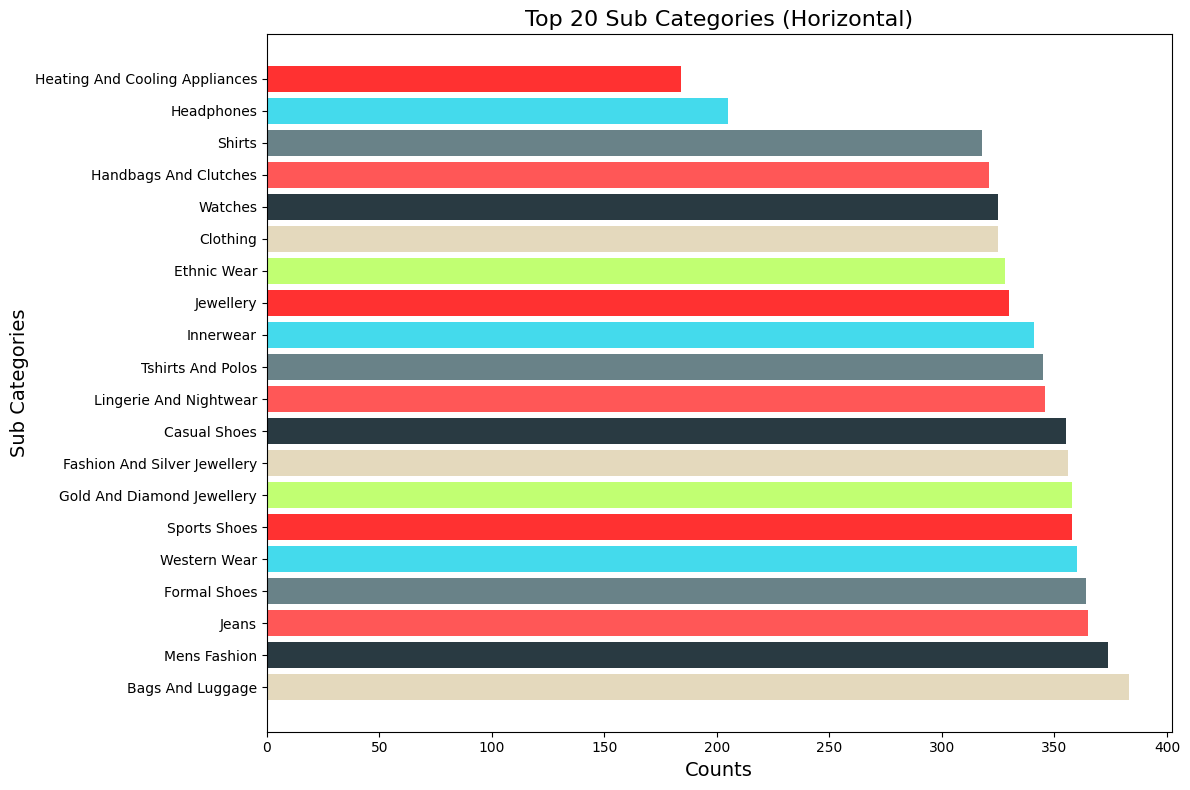

In [27]:
subcat_counts = df['sub_category'].value_counts()
top_20_subcats = subcat_counts.nlargest(20)
colors = ['#e4d9bd', '#293a42', '#ff5757', '#698288', '#44daec', '#ff3131', '#c1ff72'] * 3  
plt.figure(figsize=(12, 8))
plt.barh(top_20_subcats.index, top_20_subcats, color=colors[:len(top_20_subcats)])  # Use only necessary colors
plt.title('Top 20 Sub Categories (Horizontal)', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Sub Categories', fontsize=14)
plt.tight_layout()
plt.show()

<p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 5px; width: 80%; margin: auto; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 4. df['ratings'].</p>


In [28]:
df['ratings'].unique()

array(['3.5', '3.7', nan, '3.6', '5.0', '4.5', '3.4', '4.0', '4.4', '3.0',
       '3.3', '2.8', '2.3', '1.8', '4.2', '3.9', '4.1', '2.4', '4.3',
       '2.9', '4.6', '3.2', '1.0', '3.8', '2.0', '4.7', '2.5', '4.9',
       'Get', '3.1', '2.7', '4.8', '1.4', '1.9', '2.6', '2.2', 'FREE',
       '1.5', '1.3', '2.1', '1.7', '1.6', '₹2.99'], dtype=object)

In [29]:
df['ratings'] = df['ratings'].replace(['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99'], 0.0)
df['ratings'] = df['ratings'].astype(float)
df['ratings'] = df['ratings'].apply(lambda x: f"{int(x)}.{int((x - int(x)) * 10)}" if pd.notnull(x) else '0.0')
print(df['ratings'].unique())

['3.5' '3.7' '0.0' '3.6' '5.0' '4.5' '3.3' '4.0' '4.4' '3.0' '3.2' '2.7'
 '2.2' '1.8' '4.2' '3.9' '2.3' '2.9' '1.0' '2.0' '4.7' '2.5' '4.9' '3.1'
 '1.3' '1.9' '2.6' '1.5' '2.1' '1.7' '1.6']


In [30]:
df['ratings'].isnull().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


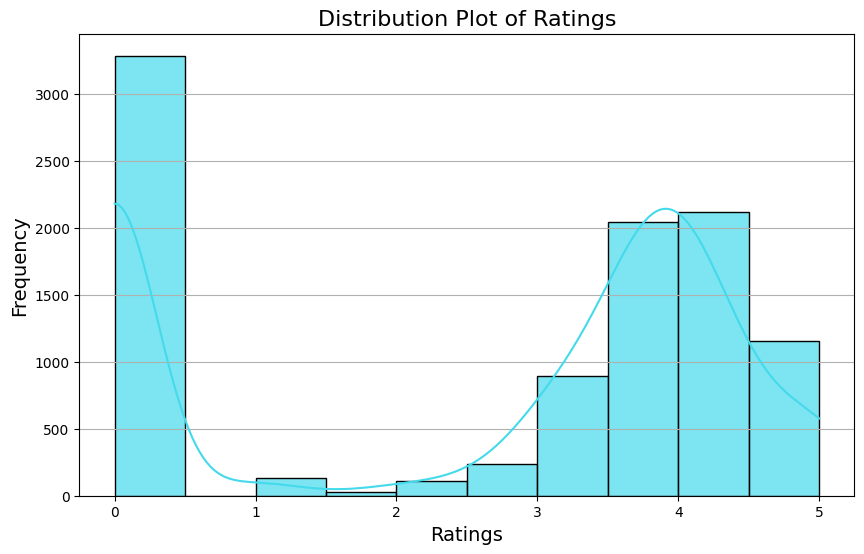

In [31]:
# Convert ratings to numeric
df['ratings'] = pd.to_numeric(df['ratings'])
# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=10, kde=True, color='#44daec', alpha=0.7)
# Set title and labels
plt.title('Distribution Plot of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Show the plot
plt.grid(axis='y')
plt.show()

In [32]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

<p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 5px; width: 80%; margin: auto; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 5. df['no_of_ratings'].</p>


In [33]:
df['no_of_ratings'].isnull().sum()

3151

In [34]:
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '', regex=False)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

In [35]:
percentage_null = df['no_of_ratings'].isnull().mean() * 100
print(percentage_null)

32.84


In [36]:
df['no_of_ratings'].value_counts()

no_of_ratings
1.0       722
2.0       471
3.0       346
4.0       264
6.0       193
         ... 
1182.0      1
2350.0      1
1330.0      1
2299.0      1
148.0       1
Name: count, Length: 1164, dtype: int64

In [37]:
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)

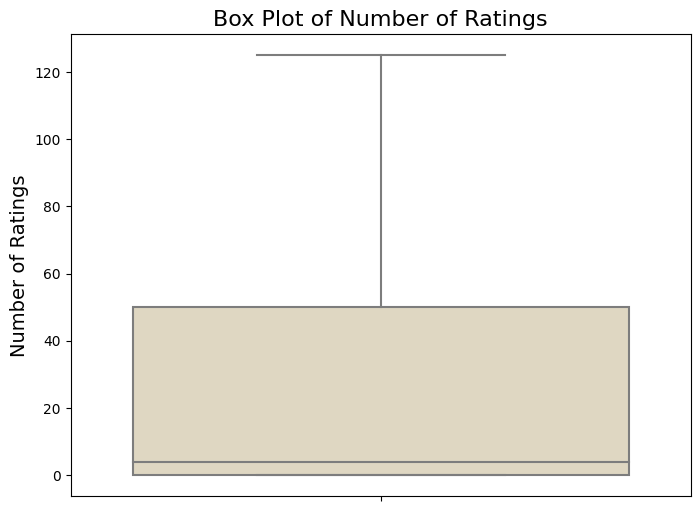

In [38]:
Q1 = df['no_of_ratings'].quantile(0.25)
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['no_of_ratings'] = df['no_of_ratings'].clip(lower_bound, upper_bound)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['no_of_ratings'], color=colors[0])  # Using the first color
plt.title('Box Plot of Number of Ratings', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=14)
# Show the plot

plt.show()

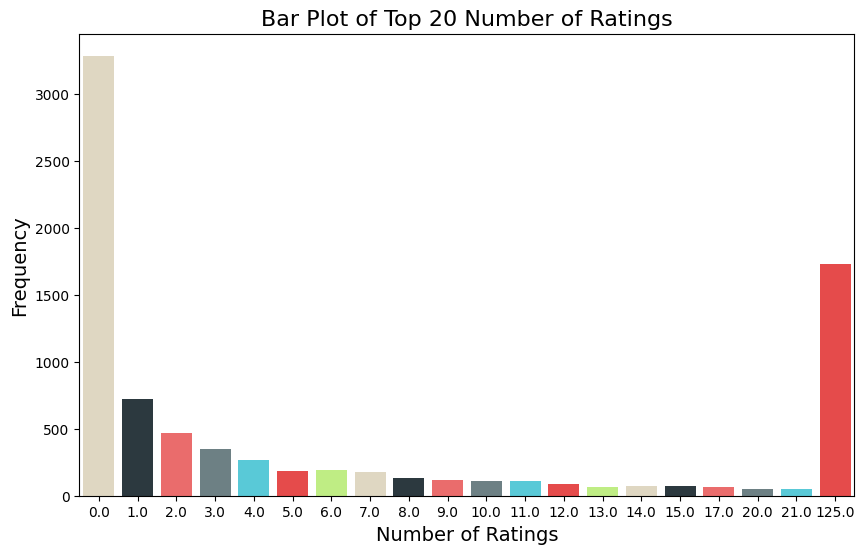

In [39]:
# Value counts of no_of_ratings and get the top 20
rating_counts = df['no_of_ratings'].value_counts().nlargest(20)
# Create a bar plot with specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors[:len(rating_counts)])  # Use a subset of colors
plt.title('Bar Plot of Top 20 Number of Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Show the plot
plt.show()

<p style="background-color: #e4d9bd; font-family:'Dancing Script', cursive; font-weight:bold; color: #ff3131; font-size:120%; text-align:center; border: 1px solid black; border-radius:10px; padding: 5px; width: 80%; margin: auto; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 5. df[['discount_price','actual_price']].</p>


In [40]:
unique_discount_prices = df['discount_price'].unique()
# Print the unique values
unique_discount_prices

array(['₹699', '₹380', '₹649', ..., '₹23,926', '₹10,611', '₹1,070'],
      dtype=object)

In [41]:
df["discount_price"] = df["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
df["actual_price"] = df["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [42]:
# Change commas to dots and change the type to float

df['discount_price'] = df["discount_price"].str.replace(',', '').astype(float)

df["actual_price"] = df["actual_price"].str.replace(',', '').astype(float)


In [43]:
df['main_category'] = df['main_category'].str.replace(' ', '')

df['sub_category'] = df['sub_category'].str.replace(' ', '')

In [44]:
# Fill NaN values with the median for discount_price and actual_price

df['discount_price'] = df['discount_price'].fillna(df['discount_price'].median())

df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())


In [45]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

df['ratings'] = df['ratings'].fillna(df['ratings'].mean())


In [46]:
# rechecking the null values 

df.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Tag Creation </h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        1. Tags help tailor recommendations to user interests.<br>
        2. They make it easier for users to find specific content.<br>
        3. Tags provide context, improving understanding of user preferences.<br>
        4. User-generated tags foster community involvement.<br>
        5. They introduce users to a wider range of content.
    </p>
</div>

In [47]:
# Loading the small English model and disable unnecessary components for speed
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "lemmatizer"])
# Function to clean text and extract tags
def clean_and_extract_tags(text):
    doc = nlp(text.lower())  # Convert text to lowercase and process with spaCy
    # Extracting tokens that are alphanumeric and not in the stopwords
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

# List of columns to apply text cleaning and tag extraction
columns_to_extract_tags_from = ['name', 'main_category', 'sub_category']
# Apply batch processing for each column to improve performance
for column in columns_to_extract_tags_from:
    texts = df[column].astype(str).tolist()  # Convert the column to a list of strings
    # Process the texts in batches and apply the cleaning function
    df[column] = [' '.join([token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]) 
                  for doc in nlp.pipe(texts, batch_size=50)]  # Use batch_size=50 for efficiency

# Combining the cleaned tags from the specified columns into a single 'Tags' column

df['Tags'] = df[columns_to_extract_tags_from].apply(lambda row: ','.join(row), axis=1)

<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Rating-Based Recommendation System</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        This system uses user ratings to generate personalized recommendations. By applying python <strong>GROUP BY</strong> clause and a simple function, we can efficiently analyze user preferences and identify trending items. This approach enhances the accuracy of recommendations by considering the collective feedback of users.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        1. Enhances personalization by focusing on user ratings.<br>
        2. Improves item discovery based on community feedback.<br>
        3. Facilitates analysis of user behavior trends.<br>
        4. Supports diverse recommendations through aggregated data.<br>
        5. Increases user engagement by showcasing popular content.<br>
        6. Builds trust as recommendations are based on actual user experiences.
    </p>
</div>

In [48]:
average_rating = df.groupby(['name','main_category', 'sub_category','no_of_ratings','discount_price','actual_price','image'])['ratings'].mean().reset_index()
average_rating.head()

,name,main_category,sub_category,no_of_ratings,discount_price,actual_price,image,ratings
0,0134 milan jewellers bis hallmarked 995 fine s...,stores,MensFashion,115.0,399.0,499.0,https://m.media-amazon.com/images/I/71xTlMv3T0...,4.2
1,032 brix meter refractometer vresourcing porta...,industrialsupplies,TestMeasureAndInspect,114.0,2999.0,3454.0,https://m.media-amazon.com/images/I/6120lK9WBM...,4.5
2,0degree jeans pant stretch denim men dark blue...,,Jeans,0.0,849.0,2499.0,https://m.media-amazon.com/images/I/61RrJ0PavD...,0.0
3,0thi1 jute tote bags women totebag office picn...,accessories,HandbagsAndClutches,1.0,689.0,759.0,https://m.media-amazon.com/images/W/IMAGERENDE...,4.0
4,1 pc cloth dust remover cleaner lint roller re...,appliances,KitchenAndHomeAppliances,70.0,229.0,499.0,https://m.media-amazon.com/images/I/31Zitjp+77...,3.6


In [49]:
top_rated_products = average_rating.sort_values(by='ratings', ascending=False)
# Select the relevant columns
top_rated_products = top_rated_products[['main_category', 'sub_category', 'no_of_ratings', 'discount_price', 'actual_price','image','ratings']]
# Display the result
rating_based_recomendation = top_rated_products.head(10)

In [50]:
rating_based_recomendation['no_of_ratings'] = rating_based_recomendation['no_of_ratings'].astype(int)
rating_based_recomendation['ratings'] = rating_based_recomendation['ratings'].astype(int)
rating_based_recomendation

/tmp/ipykernel_30/1402330643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation['no_of_ratings'] = rating_based_recomendation['no_of_ratings'].astype(int)
/tmp/ipykernel_30/1402330643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation['ratings'] = rating_based_recomendation['ratings'].astype(int)


,main_category,sub_category,no_of_ratings,discount_price,actual_price,image,ratings
5204,,Jeans,3,689.00,1499.0,https://m.media-amazon.com/images/I/81ZV9zdtCW...,5
1260,,Innerwear,1,299.00,799.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
5137,toysandbabyproducts,BabyBathSkinAndGrooming,1,199.00,599.0,https://m.media-amazon.com/images/I/710P1xWiAk...,5
5192,,KidsClothing,1,159.00,329.0,https://m.media-amazon.com/images/I/A1N315peGz...,5
5193,,Shirts,1,549.00,569.0,https://m.media-amazon.com/images/I/61EPAhnYOt...,5
6940,accessories,BagsAndLuggage,1,749.00,999.0,https://m.media-amazon.com/images/I/81bpBroJFb...,5
9230,,SportsShoes,1,689.00,3825.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
1219,industrialsupplies,TestMeasureAndInspect,2,689.00,1599.0,https://m.media-amazon.com/images/I/51DTY6Qgsx...,5
1210,accessories,HandbagsAndClutches,1,930.73,3499.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
9222,sportsandfitness,AllExerciseAndFitness,1,499.00,999.0,https://m.media-amazon.com/images/I/41-+zWdUzv...,5


<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Content-Based Recommendation System</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        A content-based recommendation system suggests items based on the features and attributes of the items themselves. This approach analyzes the characteristics of the items that a user has interacted with previously to recommend similar items. By employing techniques such as TF-IDF vectorization, we can convert textual data (such as item descriptions or tags) into a numerical format, allowing for effective comparisons between items.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        Tags are essential elements in this system; they serve as the primary features from which item vectors are created. Each item (e.g., movie, product) is represented as a vector in a multi-dimensional space based on these tags. The system calculates the similarity between these vectors to determine the most relevant recommendations for the user.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        1. Recommends items based on the characteristics of previously liked items.<br>
        2. Utilizes features like tags to represent items as vectors.<br>
        3. Employs TF-IDF to convert textual data into numeric form for analysis.<br>
        4. Enhances user experience by suggesting similar items based on individual preferences.<br>
        5. Increases the likelihood of user engagement through relevant recommendations.<br>
        6. Allows for discovery of new items that share similar attributes with items the user enjoys.
    </p>
</div>

In [51]:
df['Tags'].value_counts()

Tags
pc jeweller 22k 916 yellow gold ring women,accessories,GoldAndDiamondJewellery                                                                               14
zeya yellow gold ring,accessories,GoldAndDiamondJewellery                                                                                                    13
avsar 18k 750 white gold diamond ring women,accessories,GoldAndDiamondJewellery                                                                               7
pc jeweller 18k 750 yellow gold solitaire ring women,accessories,GoldAndDiamondJewellery                                                                      7
arrow men shirt,,Shirts                                                                                                                                       6
                                                                                                                                                             ..
trishakti crystal mala diamond cut 

In [52]:
df['name'][10]

'cleanzup universal multi stain remover grease dirt mold mildew food oil drawing color concentrated eco frien'

In [53]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['Tags'])
# Dimentionality reduction 
n_components = 12  
svd = TruncatedSVD(n_components=n_components)
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix_content)
cosine_sim_matrix = cosine_similarity(reduced_tfidf_matrix)

In [54]:
cosine_sim_matrix

array([[ 1.        ,  0.18943251,  0.21097505, ...,  0.30767677,
         0.75266698,  0.47577423],
       [ 0.18943251,  1.        ,  0.12624462, ...,  0.44534963,
         0.31153963,  0.04362347],
       [ 0.21097505,  0.12624462,  1.        , ..., -0.08270008,
         0.1667073 ,  0.33614117],
       ...,
       [ 0.30767677,  0.44534963, -0.08270008, ...,  1.        ,
         0.52083395,  0.16168475],
       [ 0.75266698,  0.31153963,  0.1667073 , ...,  0.52083395,
         1.        ,  0.80511036],
       [ 0.47577423,  0.04362347,  0.33614117, ...,  0.16168475,
         0.80511036,  1.        ]])

In [55]:
item_name = 'jj tees polyester half sleeve jersey round collar digital print men color navy blue red'
item_index = df[df['name']==item_name].index[0]

In [56]:
similar_items = list(enumerate(cosine_sim_matrix[item_index]))

In [57]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]
recommended_items_indics = [x[0] for x in top_similar_items]

In [58]:
df.iloc[recommended_items_indics][['name','sub_category','ratings','actual_price','image']]

,name,sub_category,ratings,actual_price,image
6115,souled store men official marvel venom black p...,TshirtsAndPolos,3.5,1499.0,https://m.media-amazon.com/images/W/IMAGERENDE...
107,bewakoof men iron man war black round neck pri...,TshirtsAndPolos,2.0,899.0,https://m.media-amazon.com/images/I/51kUtK0iT+...
5634,souled store men official looney tunes profess...,TshirtsAndPolos,0.0,999.0,https://m.media-amazon.com/images/I/61Fj1x0CzQ...
9922,leotude half sleeve oversized tshirts men comb...,TshirtsAndPolos,3.6,1099.0,https://m.media-amazon.com/images/I/61iz2FBPLT...
8936,souled store men burgundy solid oversized tshirts,TshirtsAndPolos,4.5,1499.0,https://m.media-amazon.com/images/W/IMAGERENDE...
2220,souled store men official black panther wakand...,TshirtsAndPolos,4.5,1299.0,https://m.media-amazon.com/images/I/51cCo4TNZC...
5295,red tape men white graphic print activewear ts...,TshirtsAndPolos,3.6,2299.0,https://m.media-amazon.com/images/I/61FXv5feOE...
7405,fashion gallery printed round neck half tshirt...,TshirtsAndPolos,2.0,799.0,https://m.media-amazon.com/images/W/IMAGERENDE...
6712,kalt men sleeve navy blue striped cotton blend...,TshirtsAndPolos,4.2,1900.0,https://m.media-amazon.com/images/W/IMAGERENDE...


In [59]:
def content_based_recommendations(df, item_name, top_n=10):
  # Checking if the item name exists in the training data

    if item_name not in df['name'].values:

        print(f"Item '{item_name}' not found in the training data.")

        return pd.DataFrame()

    # Creating a TF-IDF vectorizer for item descriptions

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Applying TF-IDF vectorization to item descriptions

    tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['Tags'])

    # Calculating cosine similarity between items based on descriptions

    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Finding the index of the item

    item_index = df[df['name'] == item_name].index[0]

    # Getting the cosine similarity scores for the item

    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sorting similar items by similarity score in descending order

    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Getting the top N most similar items (excluding the item itself)

    top_similar_items = similar_items[1:top_n+1]

    # Getting the indices of the top similar items

    recommended_item_indices = [x[0] for x in top_similar_items]

    # Getting the details of the top similar items

    recommended_items_details = df.iloc[recommended_item_indices][['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',

       'discount_price', 'actual_price']]

    return recommended_items_details

In [60]:
# content-based recommendations for a specific item

item_name = 'jj tees polyester half sleeve jersey round collar digital print men color navy blue red'

content_based_rec = content_based_recommendations(df, item_name, top_n=8)

content_based_rec

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
2520,jj tees polyester solid color half sleeve jers...,,TshirtsAndPolos,3.7,5.0,269.0,499.0
5202,jj tees polyester half sleeve jersey round col...,stores,MensFashion,3.7,125.0,345.0,999.0
3709,jj tees sports jersey men,,TshirtsAndPolos,5.0,2.0,345.0,999.0
6712,kalt men sleeve navy blue striped cotton blend...,,TshirtsAndPolos,4.2,11.0,999.0,1900.0
3487,satyuga mens cotton tshirt round neck half sle...,,TshirtsAndPolos,0.0,0.0,499.0,999.0
3357,ozio mens white color cotton half sleeve brand...,,TshirtsAndPolos,3.7,4.0,299.0,1499.0
73,vikclique half sleeve round neck black blue ts...,,TshirtsAndPolos,3.6,4.0,449.0,1499.0
5215,inkholic printed sublimation sports jersey rou...,,TshirtsAndPolos,4.0,56.0,399.0,599.0


In [224]:
# content-based recommendations for a specific item

item_name = 'cleanzup universal multi stain remover grease dirt mold mildew food oil drawing color concentrated eco frien'

content_based_rec = content_based_recommendations(df, item_name, top_n=8)



content_based_rec

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
2262,1 pc cloth dust remover cleaner lint roller re...,appliances,KitchenAndHomeAppliances,3.6,70.0,229.0,499.0
6398,bestor lcd writing tablet 10 inch colorful doo...,tvaudioandcameras,AllElectronics,3.7,125.0,449.0,999.0
6628,portable lint remover pet fur remover clothes ...,appliances,AllAppliances,3.0,125.0,689.0,199.0
4608,clarkia 1 piece 16x14 inch 13 inch long handle...,accessories,BagsAndLuggage,3.6,125.0,689.0,179.0
7353,finish power ball quantum 1 lemon 60,beautyandhealth,HouseholdSupplies,4.5,5.0,1294.0,1999.0
2121,nivea men face wash oily skin oil control 12hr...,beautyandhealth,HealthAndPersonalCare,4.2,125.0,689.0,175.0
2904,super shine white floor cleaner 1ltr pack 4 unit,beautyandhealth,HouseholdSupplies,5.0,1.0,199.0,240.0
631,jaborandii hair treatment oil 500ml hair fall ...,beautyandhealth,BeautyAndGrooming,4.5,4.0,280.0,405.0


<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Collaborative Filtering Recommendation System</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        This system leverages the preferences of similar users to recommend items. By utilizing the <strong>GROUP BY</strong> clause along with a simple function, we can analyze user-item interactions and identify patterns in user behavior. In this approach, cosine similarity is particularly useful for quantifying how similar two users or items are based on their preferences.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        Cosine similarity measures the cosine of the angle between two non-zero vectors in a multi-dimensional space. In the context of a pivot table, it can be applied to represent user preferences as vectors, allowing us to compute similarity scores. This similarity score can be used to rank items for recommendation.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        1. Provides personalized recommendations based on user similarity.<br>
        2. Utilizes collective user behavior for improved accuracy.<br>
        3. Encourages discovery of items through community insights.<br>
        4. Supports diverse recommendations based on similar tastes.<br>
        5. Boosts user engagement by connecting users with shared interests.<br>
        6. Fosters a sense of community as users influence recommendations.<br>
        7. Enhances the recommendation process through quantitative analysis of user-item interactions via cosine similarity.
    </p>
</div>


In [61]:
# craeting a product_id column that we dont have in the dataset for pivot table 
df['product_id'] = df.index + 1  # Adding 1 to start IDs from 1 instead of 0

In [62]:
df['user_index'] = df.index
user_item_matrix = df.pivot_table(index='user_index', columns='product_id', values='ratings', aggfunc='mean').fillna(0).astype(int)


In [63]:
user_item_matrix

product_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_index,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [64]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [65]:
user_similarity = cosine_similarity(user_item_matrix)

In [66]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [67]:
recommend_items = []



for user_index in similar_user_indices:

    rated_by_similar_user = user_item_matrix.iloc[user_index]

    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])



recommended_items_details = df[df['product_id'].isin(recommend_items)][['name','main_category', 'sub_category', 'ratings', 'no_of_ratings',

       'discount_price', 'actual_price']]

In [68]:
recommended_items_details.head(10)


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,myblush women,,WesternWear,3.5,9.0,699.0,2299.0
1,ridhi home decor brass decorative weighing sca...,appliances,AllAppliances,3.7,64.0,380.0,500.0
2,rangshaily mens black white floral print fulls...,,Shirts,0.0,0.0,649.0,999.0
3,adidas mens ellipto run m leather shoe,,SportsShoes,3.6,23.0,1274.0,2499.0
5,aones pack 3 magnetic loop watch strap compati...,,KidsWatches,0.0,0.0,999.0,1590.0
6,avsar 14k 585 yellow gold ring women,accessories,GoldAndDiamondJewellery,0.0,0.0,16312.0,39524.0
7,jockey modern trunks double layer contoured po...,,Innerwear,5.0,2.0,689.0,429.0
8,nilus cute shiny stone chain bracelet women gi...,accessories,FashionAndSilverJewellery,4.5,9.0,359.0,1250.0
9,chappal mens leather handmade formal shoes bro...,,FormalShoes,0.0,0.0,1899.0,1999.0
10,cleanzup universal multi stain remover grease ...,beautyandhealth,HouseholdSupplies,3.3,35.0,445.0,750.0


In [69]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):

    # Create the user-item matrix

    user_item_matrix = train_data.pivot_table(index='user_index', columns='product_id', values='ratings', aggfunc='mean').fillna(0)

    # Calculating the user similarity matrix using cosine similarity

    user_similarity = cosine_similarity(user_item_matrix)

    # Finding the index of the target user in the matrix

    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Getting the similarity scores for the target user

    user_similarities = user_similarity[target_user_index]

    # Sorting the users by similarity in descending order (excluding the target user)

    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generating recommendations based on similar users

    recommended_items = []

    for user_index in similar_users_indices:

        # Getting items rated by the similar user but not by the target user

        rated_by_similar_user = user_item_matrix.iloc[user_index]

        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extracting the item IDs of recommended items

        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items

    recommended_items_details = df[df['product_id'].isin(recommend_items)][['name','main_category', 'sub_category', 'ratings', 'no_of_ratings',

       'discount_price', 'actual_price']]

    return recommended_items_details.head(10)

# Example usage

target_user_id = 4

top_n = 5

collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id)

print(f"Top {top_n} recommendations for User {target_user_id}:")

collaborative_filtering_rec

Top 5 recommendations for User 4:


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,myblush women,,WesternWear,3.5,9.0,699.0,2299.0
1,ridhi home decor brass decorative weighing sca...,appliances,AllAppliances,3.7,64.0,380.0,500.0
2,rangshaily mens black white floral print fulls...,,Shirts,0.0,0.0,649.0,999.0
3,adidas mens ellipto run m leather shoe,,SportsShoes,3.6,23.0,1274.0,2499.0
5,aones pack 3 magnetic loop watch strap compati...,,KidsWatches,0.0,0.0,999.0,1590.0
6,avsar 14k 585 yellow gold ring women,accessories,GoldAndDiamondJewellery,0.0,0.0,16312.0,39524.0
7,jockey modern trunks double layer contoured po...,,Innerwear,5.0,2.0,689.0,429.0
8,nilus cute shiny stone chain bracelet women gi...,accessories,FashionAndSilverJewellery,4.5,9.0,359.0,1250.0
9,chappal mens leather handmade formal shoes bro...,,FormalShoes,0.0,0.0,1899.0,1999.0
10,cleanzup universal multi stain remover grease ...,beautyandhealth,HouseholdSupplies,3.3,35.0,445.0,750.0


<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        Hybrid recommendation systems integrate both content-based and collaborative filtering techniques to enhance the accuracy and relevance of recommendations. This approach utilizes the strengths of both methods, allowing for a more robust understanding of user preferences and item characteristics.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        By applying cosine similarity, we can quantitatively assess how closely related users or items are based on their features and interactions. When constructing a pivot table, cosine similarity allows us to represent user preferences as vectors, facilitating effective comparisons and recommendations. This integration leads to improved recommendations by leveraging both user behavior and item attributes.
    </p>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        1. Combines the strengths of content-based and collaborative filtering.<br>
        2. Enhances recommendation diversity and accuracy.<br>
        3. Provides a more comprehensive view of user preferences and item features.<br>
        4. Increases the likelihood of discovering new items that users may enjoy.<br>
        5. Utilizes cosine similarity for quantifying user-item relationships.<br>
        6. Leverages collective user insights alongside individual item characteristics for personalized recommendations.<br>
        7. Supports a dynamic recommendation framework that adapts to changing user preferences and item availability.
    </p>
</div>

In [70]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)

def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)
    collaborative_filtering_rec = collaborative_filtering_recommendations(df,target_user_id, top_n)
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    return hybrid_rec.head(10)

In [71]:
df['name'][20]

'sun fashion lifestyle womens cotton blend dupatta dupp corona white 225 mts'

In [72]:
# hybrid recommendations for a specific user and item

target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "sun fashion lifestyle womens cotton blend dupatta dupp corona white 225 mts"  # Change this to the item name
hybrid_rec = hybrid_recommendations(df,target_user_id, item_name, top_n=10)
print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'sun fashion lifestyle womens cotton blend dupatta dupp corona white 225 mts':


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
6176,sun fashion lifestyle womens dress material tb...,,EthnicWear,0.0,0.0,719.0,2599.0
6301,dupatta bazaar womens dupatta,,Clothing,4.2,111.0,379.0,899.0
5533,gosriki womens cotton blend anarkali solid kur...,,Clothing,3.7,26.0,459.0,2599.0
8711,w woman womens cotton blend kurta slim pant du...,,EthnicWear,3.5,12.0,3999.0,4999.0
6685,gosriki womens cotton blend straight printed k...,,Clothing,0.0,0.0,659.0,2599.0
7149,gosriki womens cotton blend straight printed k...,,Clothing,3.9,38.0,799.0,2599.0
9641,gosriki womens cotton blend printed straight k...,,Clothing,3.6,125.0,679.0,2599.0
9448,rajnandini womens cotton blend salwar suit,,Clothing,3.5,45.0,399.0,2663.0
9061,hope womens cotton kurti pant dupatta set,,Clothing,3.5,13.0,1195.0,1999.0
8870,black white lifestyle patent leather formal sh...,,FormalShoes,0.0,0.0,689.0,3299.0


<div style="border-left: 5px solid #ff3131; padding-left: 20px; background-color: #e4d9bd; border-radius: 10px; padding: 15px; font-family: 'Montserrat', sans-serif; color: #333333;">
    <h2 style="color: #ff3131; font-family: 'Montserrat', sans-serif; font-weight: bold; font-size: 28px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin: 0;">🔺 Thank You!</h2>
    <p style="font-size: 18px; line-height: 1.6; color: #333333; margin-top: 10px;">
        I sincerely appreciate your time and effort in reviewing this work. Your feedback and insights have been invaluable in improving our system and driving innovation.
    </p>
<div>
